In [1]:
import pandas as pd
import jenkspy
import spacy
import uuid
from tqdm import tqdm
tqdm.pandas()

In [84]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.options.display.max_colwidth = 500

<ipython-input-84-7eab3a9fec6a>:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
nlp = spacy.load('en_core_web_lg')

------

In [3]:
df = pd.read_csv(r"D:\Work\Coding\Data\some-news.csv")

In [ ]:
#Cleaning up garbage I injected with a previous process
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("Unnamed: 0.1", axis=1)
df['article'] = df['article'].astype(str)

In [30]:
df['GUID'] = [str(uuid.uuid4()) for x in range(len(df))]

In [6]:
df

,date,year,month,day,author,title,article,url,section,publication
0,09-12-16 18:31,2016,12,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,07-10-16 21:26,2016,10,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,26-01-18 00:00,2018,1,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,27-06-19 00:00,2019,6,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,27-01-16 00:00,2016,1,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ
...,...,...,...,...,...,...,...,...,...,...
990,20-07-18 00:00,2018,7,20,NaN,Christian Bale Shows Off Extreme Weight Loss A...,Christian Bale's ditched any vestige of Dick C...,https://www.tmz.com/2018/07/20/christian-bale-...,NaN,TMZ
991,07-03-16 16:00,2016,3,7,Tim Shiel,THUMP Australia's Monthly Oceanic Report Will ...,The Oceanic Report is our new column bringing ...,https://www.vice.com/en_us/article/wnyx4w/thum...,Noisey,Vice
992,20-12-16 00:00,2016,12,20,NaN,Nicole Kidman & Keith Urban Enjoy Christmas in...,Nicole Kidman and Keith Urban might have a whi...,https://www.tmz.com/2016/12/20/nicole-kidman-k...,NaN,TMZ
993,08-12-17 00:00,2017,12,8,NaN,Palestinian president says U.S. can no longer ...,GAZA (Reuters) - The United States cannot brok...,https://www.reuters.com/article/us-usa-trump-i...,World News,Reuters


In [43]:
def sent_tokenize(text):
# Uncomment the lines below if you're passing this off to folks that don't know how to set up NLP stuff
#     if not spacy:
#         import spacy
#         nlp = spacy.load('en_core_web_lg')
    doc = nlp(text)
    return [str(sent) for sent in doc.sents]    

------

In [44]:
df['sents'] = df['article'].progress_apply(sent_tokenize)

100%|████████████████████████████████████████████████████████████████████████████████| 995/995 [01:11<00:00, 13.82it/s]


------

In [63]:
df['sents'].explode()

0      This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices.
0                                                                                                               Imagine you are an otherwise healthy 30-something who starts feeling weird.
0                                                                                                                                                        You are sometimes short of breath.
0                                                                                                                                                                        You get migraines.
0                                                                                                                                                        Your feet start to swell a little.
                                                            

In [60]:
df2 = df[['GUID', 'sents']].explode('sents')

In [71]:
df_counts = pd.DataFrame(pd.cut(
    df2["GUID"].value_counts(),
    bins=jenkspy.jenks_breaks(df2["GUID"].value_counts(), n_classes=4),
    labels=['bucket_1', 'bucket_2', 'bucket_3', 'bucket_4'],
    include_lowest=True))

In [72]:
df_counts['GUID'].value_counts()

bucket_1    704
bucket_2    237
bucket_3     51
bucket_4      3
Name: GUID, dtype: int64

<AxesSubplot:>

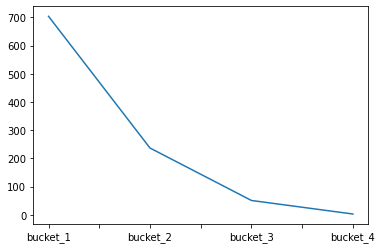

In [77]:
df_counts['GUID'].value_counts().plot()

In [87]:
df_counts = df_counts.reset_index().rename(columns={"GUID":"bucket",'index':"GUID"})
df_counts

,GUID,bucket
0,846704f5-2d57-4c8f-a807-d7675768f1b6,bucket_4
1,bf930e9d-4a72-42dc-b28a-f3ad193e8125,bucket_4
2,05564a13-d8dd-4d2a-89f9-67b628969064,bucket_4
3,e0c655b9-76ae-4e24-b66b-673d00f9eac5,bucket_3
4,0c36bf88-e493-4cc8-8dd2-f1a90d55b6e0,bucket_3
...,...,...
990,4b28e186-5ec8-49c9-8a96-9ca52481ca80,bucket_1
991,04b318a9-efc1-4be5-841a-19de95a8b4ae,bucket_1
992,d964d5d7-307b-45e4-8eec-701aafa1d0f3,bucket_1
993,583efbfc-43a4-4be1-b1af-5aac81c49184,bucket_1


In [76]:
df2[df2['GUID']=='3d2caa77-352c-4936-b565-58c287ab5067']

,GUID,sents
321,3d2caa77-352c-4936-b565-58c287ab5067,Today’s Apple iPhone/iPad/MacBook/Apple Watch showcase will be livestreamed on Twitter for the first time.
321,3d2caa77-352c-4936-b565-58c287ab5067,"The company has been livestreaming its product announcements for years, but until now it has always tried to keep the show on its Safari browser."
321,3d2caa77-352c-4936-b565-58c287ab5067,"Apple will be running the stream through its Twitter account — which never tweets and only runs paid ads, so you can’t actually see anything on its profile page."
321,3d2caa77-352c-4936-b565-58c287ab5067,"Once you spot the ad on the Twitter page, you can “Like” it, which will get Apple to tweet updates at you about the event once it starts."
321,3d2caa77-352c-4936-b565-58c287ab5067,"Listen to Bloomberg’s Apple reporter Mark Gurman talk about Apple’s strategy with its new iPhones; follow Recode’s live coverage of the event, which begins at 10 am PT."
321,3d2caa77-352c-4936-b565-58c287ab5067,[Jacob Kastrenakes / The Verge]
321,3d2caa77-352c-4936-b565-58c287ab5067,[Want to get the Recode Daily in your inbox?
321,3d2caa77-352c-4936-b565-58c287ab5067,Subscribe here.]
321,3d2caa77-352c-4936-b565-58c287ab5067,"Facebook is building large-scale AI to help its content moderators, who can’t possibly look through every single image that gets posted on the enormous platform."
321,3d2caa77-352c-4936-b565-58c287ab5067,"Its machine-learning system, called Rosetta, is designed to help identify text in more than a billion images and videos daily, and then transcribe the words in a way that’s machine-readable."


<AxesSubplot:>

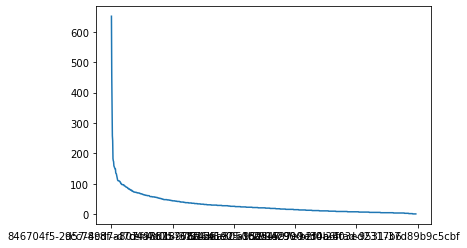

In [62]:
df2["GUID"].value_counts().plot()

In [61]:
df2

,GUID,sents
0,7c7756c6-b8cf-413f-a97f-a49328e35d39,"This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices."
0,7c7756c6-b8cf-413f-a97f-a49328e35d39,Imagine you are an otherwise healthy 30-something who starts feeling weird.
0,7c7756c6-b8cf-413f-a97f-a49328e35d39,You are sometimes short of breath.
0,7c7756c6-b8cf-413f-a97f-a49328e35d39,You get migraines.
0,7c7756c6-b8cf-413f-a97f-a49328e35d39,Your feet start to swell a little.
...,...,...
994,2ba598d0-4453-43c7-afb9-f36c31bb1e3d,Keep scrolling for a peek inside this over-the-top apartment.
994,2ba598d0-4453-43c7-afb9-f36c31bb1e3d,"\n\n\n\n\n\n\n\n\n\n\nChevron icon\nIt indicates an expandable section or menu, or sometimes previous / next navigation options."
994,2ba598d0-4453-43c7-afb9-f36c31bb1e3d,"\n\n \n\n\n\nChevron icon\nIt indicates an expandable section or menu, or sometimes previous / next navigation options."
994,2ba598d0-4453-43c7-afb9-f36c31bb1e3d,"\n\n \n\nIn the entryway, two custom, glass-enclosed, temperature-controlled wine rooms display over 1,000 bottles of wine."
